#### 목표
 - 패션 이미지 데이터(10가지)를 분류하는 모델을 만들어보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras 제공 데이터셋 불러오기
from tensorflow.keras.datasets import fashion_mnist

#### 데이터 불러오기

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
# 크기 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

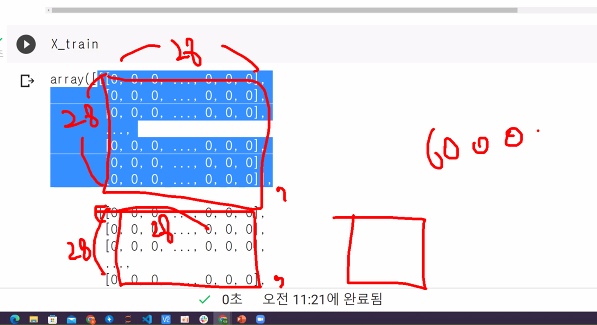

In [4]:
np.unique(y_train) # numpy 에서 중복된 수 제거 : np.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.unique(y_train).size # 클래스 10 <- 출력에서 사용

10

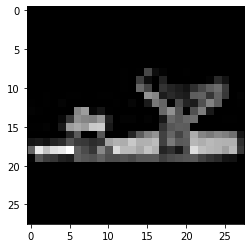

In [6]:
# 이미지화 출력
plt.imshow(X_train[59999],cmap = 'gray')
plt.show()

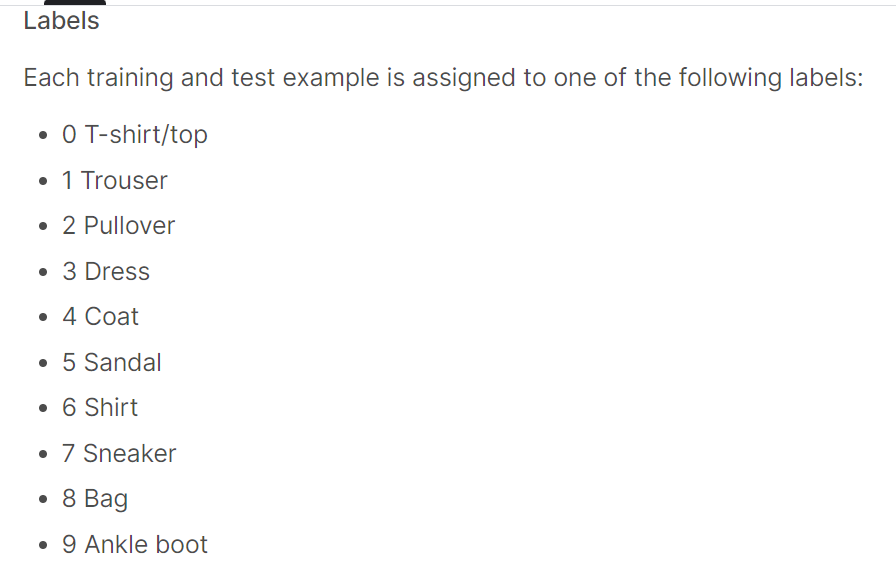

In [7]:
#59999번째 이미지 데이터 정답 확인
y_train[59999] # <= 5번 샌달 이미지라는 정답 데이터를 말함

5

#### 정답데이터 원핫인코딩

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_oh = pd.get_dummies(y_train) # 원핫 인코딩 방법 
y_test_oh = pd.get_dummies(y_test) # 원핫 인코딩 방법
y_train_oh.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


#### 데이터 분할

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 검증용 데이터셋 분리
# 8:2
# random_state = 3 
X_train, X_val, y_train_oh, y_val_oh = train_test_split(X_train,
                                                        y_train_oh,
                                                        test_size=0.2,
                                                        random_state=3
                                                        )

print(X_train.shape)
print(y_train_oh.shape)
print(X_val.shape)
print(y_val_oh.shape)

(48000, 28, 28)
(48000, 10)
(12000, 28, 28)
(12000, 10)


#### 신경망 설계

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 역할을 하는 모듈

In [12]:
model = Sequential()
# 입력층 특성 개수 연결 -> flatten 
# input_shape 는 input_dim 과 같은 역할을 하는데 상황에 따라 다름 행과 열 2개니까 shape 써야함
model.add(Flatten(input_shape=(28,28)))

# 중간층
model.add(Dense(units=450, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))

# 출력층
model.add(Dense(10,activation='softmax')) # 0~9 (10개의 클래스 레이블의 개수)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 450)               353250    
                                                                 
 dense_1 (Dense)             (None, 200)               90200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 469,110
Trainable params: 469,110
Non-trai

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
h = model.fit(X_train, y_train_oh,
              validation_data=(X_val,y_val_oh),
              epochs = 50,
              batch_size = 32
              )

Epoch 1/50
1500/1500 [==============================] - 8s 3ms/step - loss: 1.1994 - accuracy: 0.7751 - val_loss: 0.4792 - val_accuracy: 0.8303
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4685 - accuracy: 0.8357 - val_loss: 0.4511 - val_accuracy: 0.8417
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4369 - accuracy: 0.8448 - val_loss: 0.4279 - val_accuracy: 0.8593
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4069 - accuracy: 0.8534 - val_loss: 0.3656 - val_accuracy: 0.8670
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3908 - accuracy: 0.8596 - val_loss: 0.4114 - val_accuracy: 0.8578
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3688 - accuracy: 0.8669 - val_loss: 0.4105 - val_accuracy: 0.8553
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3489 - accuracy: 0.8751 - val_loss: 0.3519 - val_accuracy:

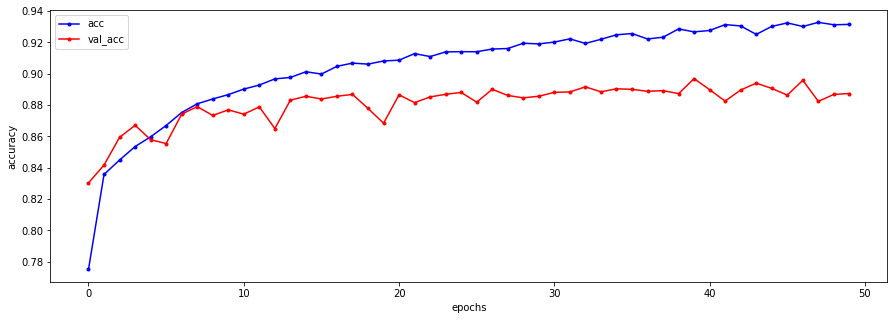

In [15]:
plt.figure(figsize=(15,5))

plt.plot(h.history['accuracy'], label='acc', c='blue', marker='.')

# 검증용 하는 이유 : 과대적합 막기위해서
plt.plot(h.history['val_accuracy'], label='val_acc', c='red', marker='.')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()
plt.show()

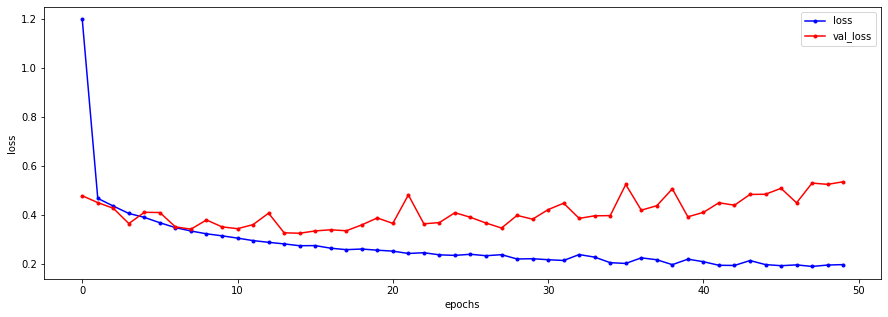

In [16]:
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss', c='blue', marker='.')

# 검증용 하는 이유 : 과대적합 막기위해서
plt.plot(h.history['val_loss'], label='val_loss', c='red', marker='.')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

In [17]:
pre = model.predict(X_test)
pre 
# 2차원 배열이 나오고 총 10개임 (출력층이 10개)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.0117798e-07,
        5.2582839e-37, 9.9999917e-01],
       [2.9701658e-04, 3.2198869e-08, 9.9924183e-01, ..., 0.0000000e+00,
        1.2993813e-13, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.4822912e-15, 1.0000000e+00, 3.7317214e-34, ..., 5.6395798e-36,
        9.7629708e-19, 4.7393338e-38],
       [1.0323762e-20, 4.5645720e-20, 9.2566157e-13, ..., 1.3735007e-02,
        1.4033703e-03, 4.3137994e-04]], dtype=float32)

In [18]:
pre[0] # 예측한 값의 맨 첫번째 데이터

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.3967255e-11, 0.0000000e+00, 8.0117798e-07,
       5.2582839e-37, 9.9999917e-01], dtype=float32)

In [20]:
y_test[0]

9

In [21]:
model.evaluate(X_test, y_test_oh) # 정확도 : 0.878000000~

313/313 [==============================] - 1s 3ms/step - loss: 0.6059 - accuracy: 0.8780


[0.6059122681617737, 0.878000020980835]